# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
housing = pd.read_csv('../data/boston_data.csv')

housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [4]:
housing['rad'].value_counts()

24.0    111
5.0      93
4.0      83
3.0      33
2.0      19
6.0      19
8.0      18
7.0      15
1.0      13
Name: rad, dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

<AxesSubplot:>

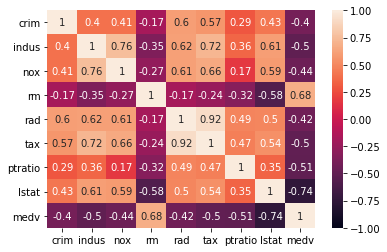

In [5]:
sns.heatmap(housing.drop(columns=['chas','dis','zn','black','age']).corr(),vmin=-1, vmax=1,annot=True)

In [7]:
housing.corrwith(housing['medv'])

crim      -0.400956
zn         0.355608
indus     -0.501698
chas       0.141400
nox       -0.439225
rm         0.683541
age       -0.390863
dis        0.264876
rad       -0.423508
tax       -0.495792
ptratio   -0.506313
black      0.360071
lstat     -0.742695
medv       1.000000
dtype: float64

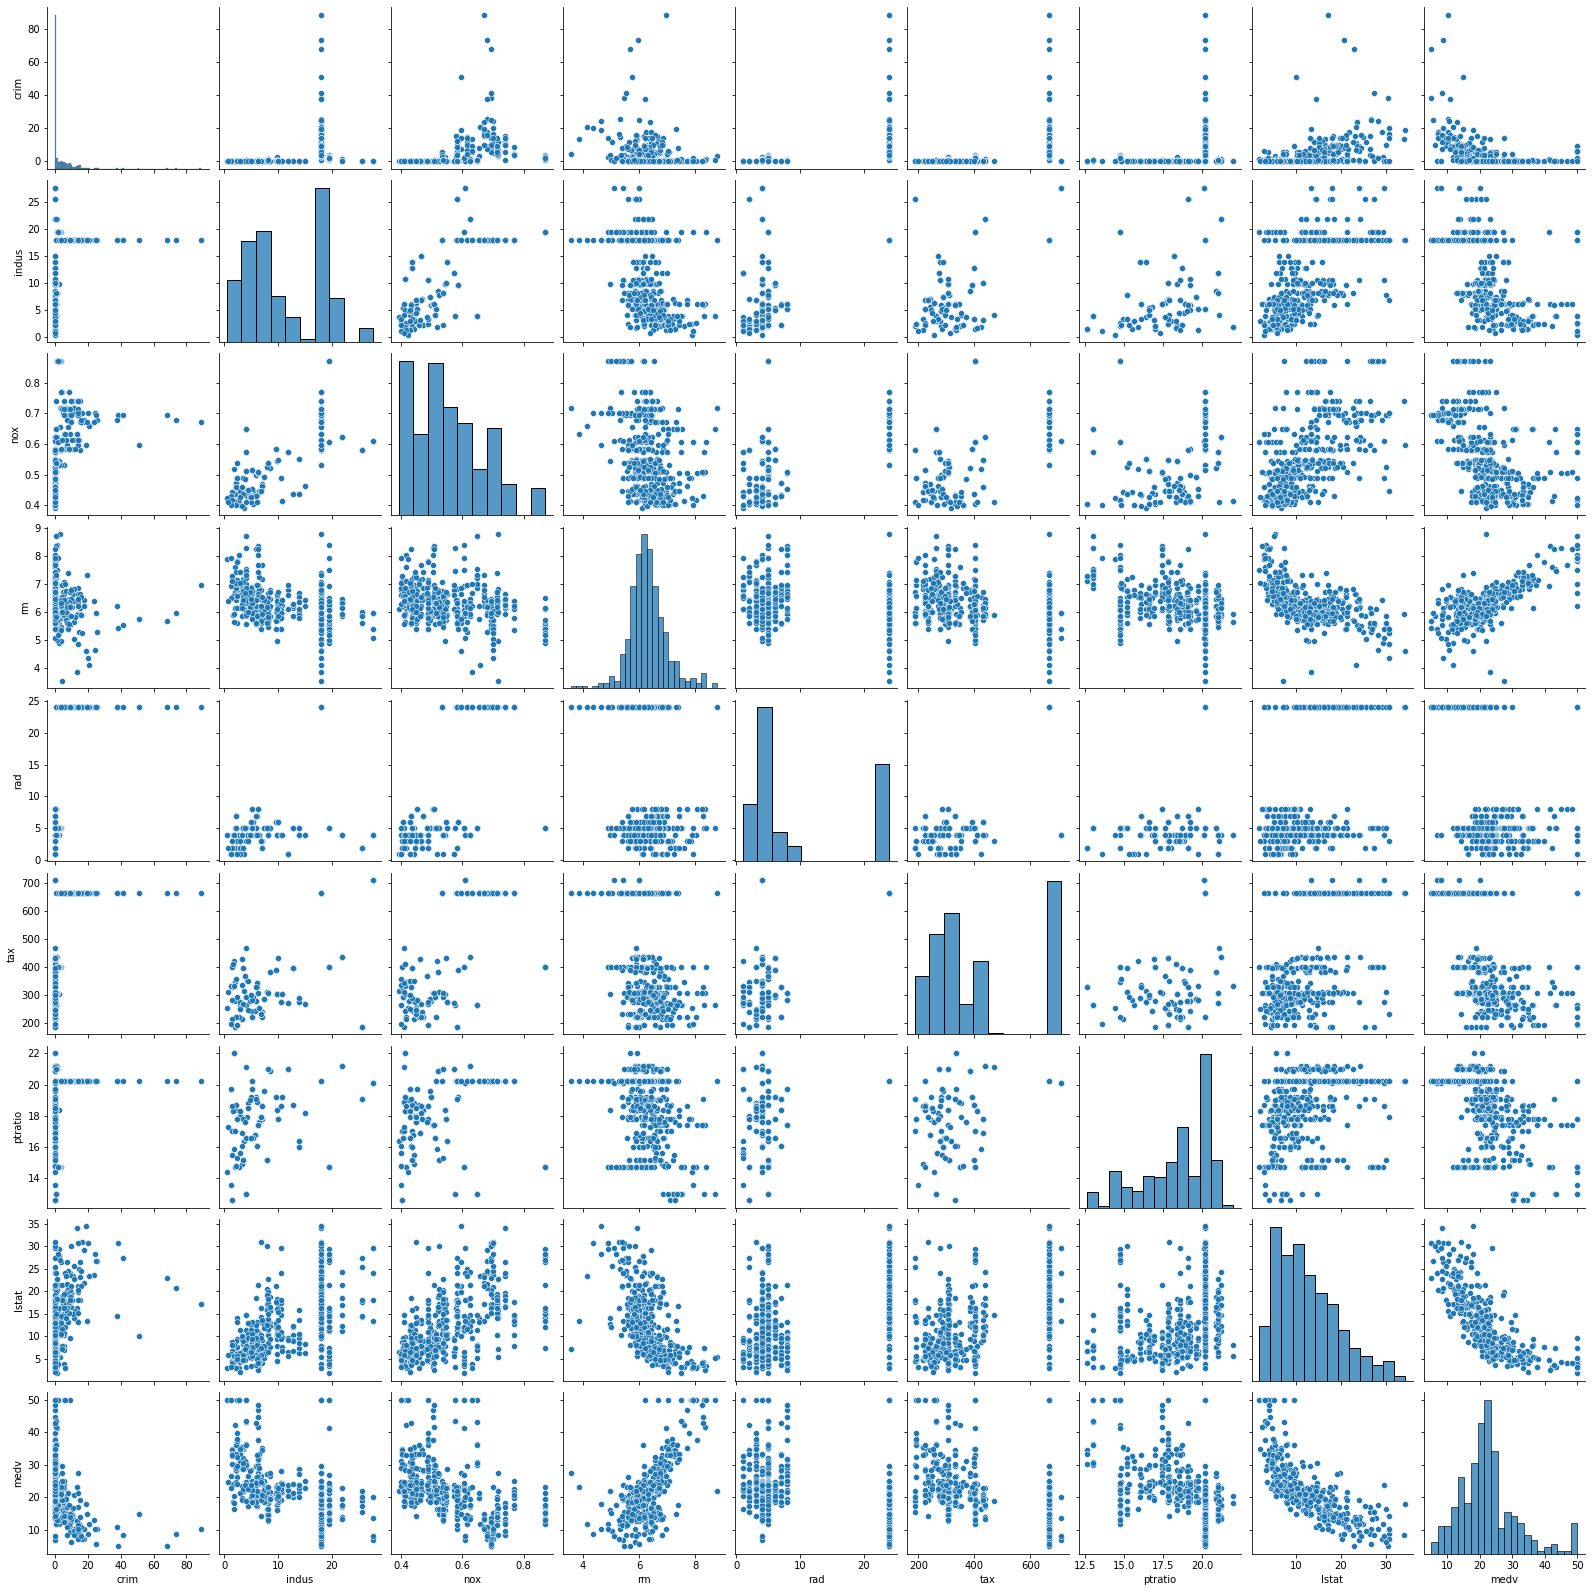

In [8]:
test = housing.drop(columns=['chas','dis','zn','black','age'])


sns.pairplot(test)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Some variables have a clear correlation with MEDV (like lstat and rm) and some others have a less clear one

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# I already did a heatmap :) 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [10]:
housing['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [52]:
from sklearn.metrics import r2_score,mean_squared_error

def performance_metric(y_true, y_predict,metrics=True):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    MSE = mean_squared_error(y_true, y_predict)
    R = r2_score(y_true, y_predict)
    
    if metrics == True:
        print('R2 score:', np.round(R,3))
        print('MSE score:', np.round(MSE,3))
        print('\n')
    
    return R, MSE

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [13]:
y = housing['medv']
X = housing.drop(columns='medv')

In [14]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y,random_state=1123)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [15]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor as rfr

forest1 = rfr(max_depth = 2)
forest2 = rfr(max_depth = 4)
forest3 = rfr(max_depth = 6)
forest4 = rfr(max_depth = 8)
forest5 = rfr(max_depth = 10)

Now, plot the score for each tree on the training set and on the testing set.

In [50]:
# Produce a plot with the score for the testing and training for the different max depths

forest1.fit(X_train,y_train)
y_pred_tr1 = forest1.predict(X_train)
y_pred_ts1 = forest1.predict(X_test)
print('max_depth = 2')
print('Train')
r2_tr1,_ = performance_metric(y_train, y_pred_tr1,metrics=True)
print('Test')
r2_ts1,_ = performance_metric(y_test, y_pred_ts1,metrics=True)

forest2.fit(X_train,y_train)
y_pred_tr2 = forest2.predict(X_train)
y_pred_ts2 = forest2.predict(X_test)
print('max_depth = 4')
print('Train')
r2_tr2,_ = performance_metric(y_train, y_pred_tr2,metrics=True)
print('Test')
r2_ts2,_ = performance_metric(y_test, y_pred_ts2,metrics=True)

forest3.fit(X_train,y_train)
y_pred_tr3 = forest3.predict(X_train)
y_pred_ts3 = forest3.predict(X_test)
print('max_depth = 6')
print('Train')
r2_tr3,_ = performance_metric(y_train, y_pred_tr3,metrics=True)
print('Test')
r2_ts3,_ = performance_metric(y_test, y_pred_ts3,metrics=True)

forest4.fit(X_train,y_train)
y_pred_tr4 = forest4.predict(X_train)
y_pred_ts4 = forest4.predict(X_test)
print('max_depth = 8')
print('Train')
r2_tr4,_ = performance_metric(y_train, y_pred_tr4,metrics=True)
print('Test')
r2_ts4,_ = performance_metric(y_test, y_pred_ts4,metrics=True)

forest5.fit(X_train,y_train)
y_pred_tr5 = forest5.predict(X_train)
y_pred_ts5 = forest5.predict(X_test)
print('max_depth = 10')
print('Train')
r2_tr5,_ = performance_metric(y_train, y_pred_tr5,metrics=True)
print('Test')
r2_ts5,_ = performance_metric(y_test, y_pred_ts5,metrics=True)

max_depth_list = [2,4,6,8,10]
r2_tr_list = [r2_tr1,r2_tr2,r2_tr3,r2_tr4,r2_tr5]
r2_ts_list = [r2_ts1,r2_ts2,r2_ts3,r2_ts4,r2_ts5]

plot = pd.DataFrame({'max_depth':max_depth_list,'R2_Train':r2_tr_list,'R2_Test':r2_ts_list})

max_depth = 2
Train
R2 score: 0.76
MSE score: 17.71


Test
R2 score: 0.82
MSE score: 16.79


max_depth = 4
Train
R2 score: 0.9
MSE score: 7.09


Test
R2 score: 0.89
MSE score: 10.06


max_depth = 6
Train
R2 score: 0.94
MSE score: 4.0


Test
R2 score: 0.91
MSE score: 8.81


max_depth = 8
Train
R2 score: 0.97
MSE score: 2.46


Test
R2 score: 0.91
MSE score: 8.07


max_depth = 10
Train
R2 score: 0.97
MSE score: 2.29


Test
R2 score: 0.91
MSE score: 8.04




[Text(0.5, 0, 'max_depth'), Text(0, 0.5, 'R2')]

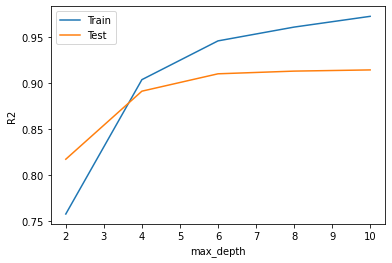

In [47]:
sns.lineplot(data=plot,x='max_depth',y='R2_Train',label='Train')
ax =sns.lineplot(data=plot,x='max_depth',y='R2_Test',label='Test')
ax.set(xlabel='max_depth', ylabel='R2')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
#More depth leads to better results for the train set but for the test set at some point it stops increasing

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
#with mx_depth=1 the model suffers from high bias, and with max_depth=10 from high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [54]:
forest2.fit(X_train,y_train)
y_pred_tr2 = forest2.predict(X_train)
y_pred_ts2 = forest2.predict(X_test)
print('max_depth = 4')
print('Train')
r2_tr2,_ = performance_metric(y_train, y_pred_tr2,metrics=True)
print('Test')
r2_ts2,_ = performance_metric(y_test, y_pred_ts2,metrics=True)

max_depth = 4
Train
R2 score: 0.905
MSE score: 6.9


Test
R2 score: 0.899
MSE score: 9.425




In [ ]:
# With max_depth = 4 there is no overfitting and the overall score is quite good

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# The model has been trained according to features that might not be relevant today, 
# like the proportion of black people, and also with inflation and changes in taxation some others would have
# to be adjusted. Finally, different regions have completely different prices depending on whether they are rural
# or urban and many other things that would have to be taken into account.